In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
%matplotlib inline

In [46]:
df = pd.read_csv('homeruns.csv')

In [87]:
df = df[df['Distance'] > 400]
df_series = df['Ballpark'].value_counts()
type(df_series.sort_index().index)

pandas.core.indexes.base.Index

In [88]:
df2 = pd.DataFrame(index=df_series.sort_index().index)
df2['Average Distance (ft)'] = df.groupby(['Ballpark'])['Distance'].mean().sort_index()
df2['Average Speed Off Bat (mph)'] = df.groupby(['Ballpark'])['Speed Off Bat'].mean().sort_index()
df2.index.name = 'Ballpark'
df2.reset_index(inplace=True)
df2

,Ballpark,Average Distance (ft),Average Speed Off Bat (mph)
0,ATT Park,423.714286,105.861905
1,Angel Stadium,422.243590,106.605128
2,Busch Stadium,422.902439,106.262195
3,Chase Field,428.146789,107.617431
4,Citi Field,422.280000,106.030667
5,Citizens Bank Park,421.028986,105.952174
6,Comerica Park,425.893333,107.493333
7,Coors Field,433.433333,107.090000
8,Dodger Stadium,418.240506,105.537975
9,Fenway Park,422.584416,106.322078


18

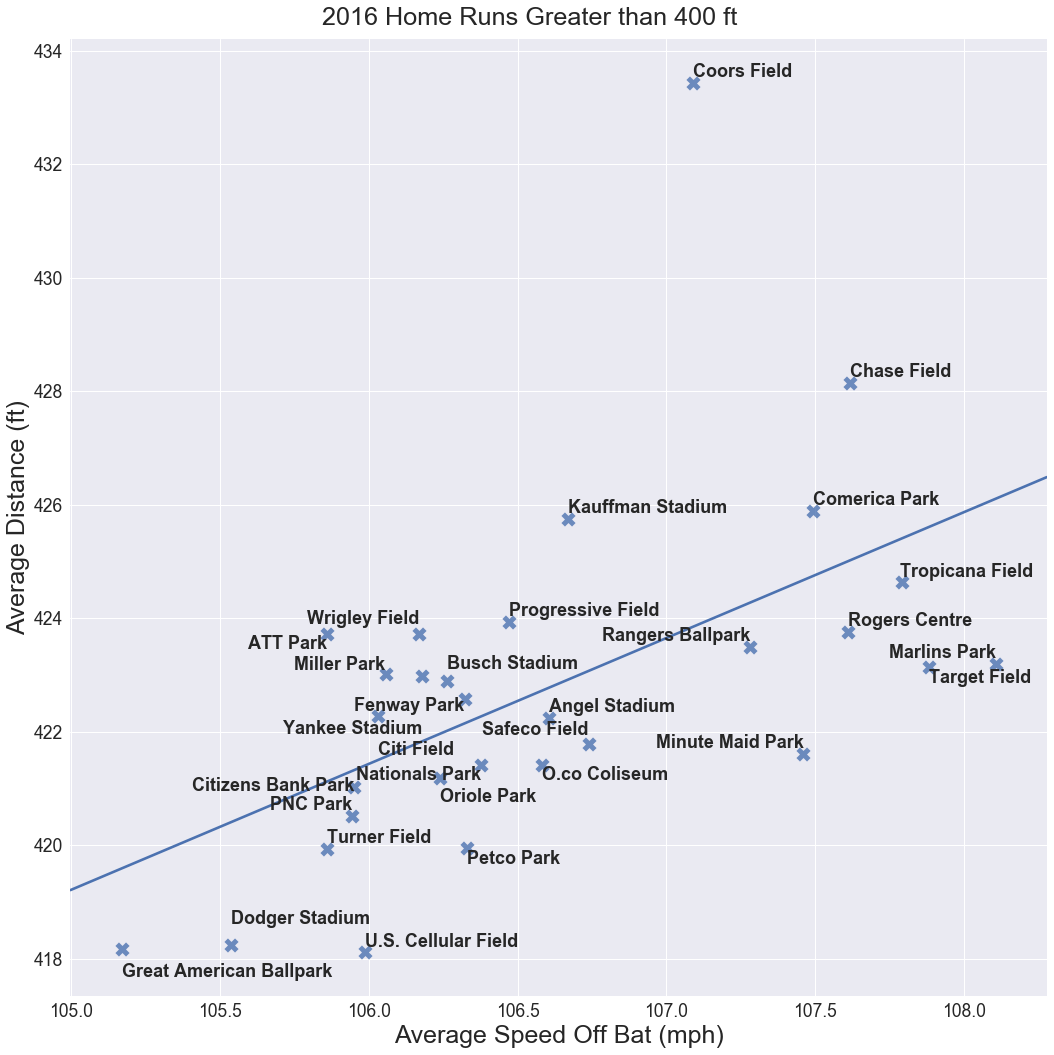

In [126]:
sns.set(font_scale=1.75)
a = sns.lmplot(x='Average Speed Off Bat (mph)',y='Average Distance (ft)',data=df2, size=15, legend=True, fit_reg=True, markers=["X"], scatter_kws={"s": 200}, ci=None)
a.set_xlabels(fontsize=25)
a.set_ylabels(fontsize=25)
sns.plt.subplots_adjust(top=0.95)
sns.plt.suptitle('2016 Home Runs Greater than 400 ft')
texts = []
    
for i in range(len(df2)):
    texts.append(plt.text(df2.iloc[i]['Average Speed Off Bat (mph)'], df2.iloc[i]['Average Distance (ft)'], df2.iloc[i]['Ballpark'],fontsize=18, fontweight='bold'))

adjust_text(texts, only_move={'points':'y', 'text':'y'}, force_points=0.35, force_text=1)